# Prueba 1
`Benjamín Meneses`

In [1]:
sc

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
3,application_1643152009659_0004,pyspark,idle,Link,Link,None,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<SparkContext master=yarn appName=livy-session-3>

In [2]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SQLContext

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [3]:
df_transantiago = spark.read.parquet('s3://bigdata-desafio/transantiago/')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [4]:
df_transantiago.columns

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['fechahoratrx', 'codigoentidad', 'nombreentidad', 'codigositio', 'nombresitio', 'nrotarjeta', 'day', 'from', 'to']

### Ejercicio 1: Operaciones básicas

- Determine:
    - Cantidad de transacciones.
    - Primera y última transacción en función de la columna fechahoratrx.


In [7]:
# Cantidad de Transacciones
df_transantiago.count()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

456532128

In [20]:
# Primera Columna
df_transantiago.head(1)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[Row(fechahoratrx=datetime.datetime(2018, 8, 8, 6, 17), codigoentidad=4, nombreentidad='U4 - Express', codigositio=5517, nombresitio='ZN-6156', nrotarjeta='10699ec735e3a7ef1d5b15a5c77c6ef2684568c289b030aeb0922b62d947cc6b', day=20180903, from=20180827, to=20180829)]

In [18]:
# Última columna
df_transantiago.orderBy(df_transantiago.fechahoratrx, ascending=False).head(1)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[Row(fechahoratrx=datetime.datetime(2018, 9, 3, 22, 55, 22), codigoentidad=15, nombreentidad='U1 - Alsacia', codigositio=13942, nombresitio='BJFD-13', nrotarjeta='12dbec71fb4d0dde9e322db14d98cf0ee569ce1b25c6d763c0f4a1e26c965265', day=20180907, from=20180903, to=20180905)]

### Ejercicio 2: Operadores del servicio
- Liste los distintos operadores.
- Muestre la cantidad de transacciones para cada operador.


In [29]:
# Lista de distintos operadores
df_transantiago.select('nombreentidad').distinct().show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------+
|     nombreentidad|
+------------------+
|        METRO - OT|
|      U1 - Alsacia|
|         U3 - Vule|
|U5 - Metropolitana|
|          U7 - STP|
|       U2 - Su Bus|
|       U6 - Redbus|
|      U4 - Express|
|      Tren Central|
+------------------+

In [25]:
# Cantidad de transacciones por operador
df_transantiago.select('nombreentidad').groupBy('nombreentidad').agg({'nombreentidad': 'count'}).show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------+--------------------+
|     nombreentidad|count(nombreentidad)|
+------------------+--------------------+
|        METRO - OT|           202471859|
|      U1 - Alsacia|            27317884|
|         U3 - Vule|            48198386|
|U5 - Metropolitana|            46727071|
|          U7 - STP|            17825212|
|       U2 - Su Bus|            39337668|
|       U6 - Redbus|            26101394|
|      U4 - Express|            42893078|
|      Tren Central|             5659576|
+------------------+--------------------+

### Ejercicio 3: Tarjetas Bip! (4 Puntos)
- Muestre las 20 tarjetas con más transacciones. (2 Puntos)
- Cuente todas las tarjetas que posean más de 2 transacciones por día. (2 ### Puntos)


In [32]:
# Las 20 tarjetas con mas transacciones
df_transantiago.select('nrotarjeta').groupBy('nrotarjeta').agg({'nrotarjeta': 'count'}).orderBy('count(nrotarjeta)', ascending=False).head(20)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[Row(nrotarjeta='deec3122b409a5fc5f1fae75342c9944e2ca3083b98c11f0cebc3f51cd46f7ef', count(nrotarjeta)=1411), Row(nrotarjeta='de9c88570da017d4a5293eada71f5b21c8acc6df520a4c66536d9aa2f227a51e', count(nrotarjeta)=1263), Row(nrotarjeta='3067b87bcbd4539f6df8736f68cad46c64aec8b77a77a1a1be17a010bbffbffd', count(nrotarjeta)=1194), Row(nrotarjeta='469ea593723b604d5fcc25b67effdac21a6e5910a8e199d278ed6dde72afea81', count(nrotarjeta)=1163), Row(nrotarjeta='803c9ddf9d09d177f74ab978992d15a69b19fc617c4bd4c8a1a2f972bfdf5085', count(nrotarjeta)=1153), Row(nrotarjeta='fa3875d0e0cc7ccd52aff44718fc0b827e92b823c33bcc0dd0a27100dd9c5182', count(nrotarjeta)=1153), Row(nrotarjeta='9eeec446133e409fa1832c3051bfb13824f561539366fea0b063b58c52026997', count(nrotarjeta)=1142), Row(nrotarjeta='96d6b2eb577ab2629e205a41381a60839b9294b605ef7ef0350fa3c0bf3e65f1', count(nrotarjeta)=1139), Row(nrotarjeta='b34fa35f11aa675f1ffa3e8cbdd39811b25e8acf4d95b0084a7bae914a4e955b', count(nrotarjeta)=1139), Row(nrotarjeta='06cfe644a7b

In [52]:
from pyspark.sql.functions import col, date_format
# Preprocessing de Cuenta de tarjetas
df_aux = df_transantiago \
    .select('nrotarjeta', 'fechahoratrx') \
    .withColumn('day', date_format(col('fechahoratrx'), "yyyy-MM-dd").cast('date')) \
    .groupBy('nrotarjeta', 'day') \
    .agg({'fechahoratrx': 'count'})

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [53]:
# Cuenta de tarjetas con mas de 2 transacciones por dia
df_aux.filter(df_aux['count(fechahoratrx)'] > 2).select('nrotarjeta').distinct().count()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

5353814

### Ejercicio 4: Fechas y rangos de horario

- Determine los 10 días con más transacciones.
- Realice una comparación de la cantidad de transacciones por hora para cada
operador. Muestre sus resultados en un gráfico donde el eje X sea la hora del día y el
eje Y la cantidad de transacciones.


In [47]:
# Los 10 días con mas transacciones
df_transantiago.select('day').groupBy('day').agg({'day': 'count'}).orderBy('count(day)', ascending=False).show(10)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------+----------+
|     day|count(day)|
+--------+----------+
|20180905|  31744566|
|20180829|  31342073|
|20180906|  31094958|
|20180830|  30428954|
|20180904|  29381756|
|20180828|  29160422|
|20180907|  29022302|
|20180903|  28239103|
|20180831|  28081352|
|20180902|  28042254|
+--------+----------+
only showing top 10 rows

In [24]:
from pyspark.sql.functions import col, date_format
df_horas = df_transantiago.select('codigoentidad', 'nombreentidad', 'fechahoratrx') \
    .withColumn('hora', date_format(col('fechahoratrx'), "HH")) \
    .groupBy('hora', 'codigoentidad') \
    .agg({'fechahoratrx': 'count'})


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [25]:
df_horas.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----+-------------+-------------------+
|hora|codigoentidad|count(fechahoratrx)|
+----+-------------+-------------------+
|  15|            4|            2222304|
|  22|            1|            5028272|
|  07|            9|            1564855|
|  00|           16|              91194|
|  03|           16|               8971|
|  20|           17|             334762|
|  10|            5|            2130718|
|  09|            9|             919913|
|  01|            4|              55323|
|  03|            5|              15119|
|  14|            2|            1992189|
|  13|            2|            2124341|
|  05|           17|              10943|
|  09|           13|            1727953|
|  17|           16|            3207665|
|  09|            4|            2769748|
|  00|           13|              14963|
|  13|            1|           11416406|
|  19|            4|            3042784|
|  14|           16|            2432082|
+----+-------------+-------------------+
only showing top

In [26]:
operadores_df = df_transantiago.select('codigoentidad').distinct().toPandas()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [27]:
operadores_cods = list(operadores_df['codigoentidad'])

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [30]:
operadores = dict()
for operador in operadores_cods:
    operadores[operador] = df_horas.filter(df_horas.codigoentidad == operador)
    operadores[operador].registerTempTable(f'result_{operador}')


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [45]:
df_horas.registerTempTable('horas_results')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [46]:
%%sql -o df_local_horas --maxrows 100
SELECT * FROM horas_results

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Output()

In [54]:
%pip install seaborn

     |████████████████████████████████| 292 kB 26.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


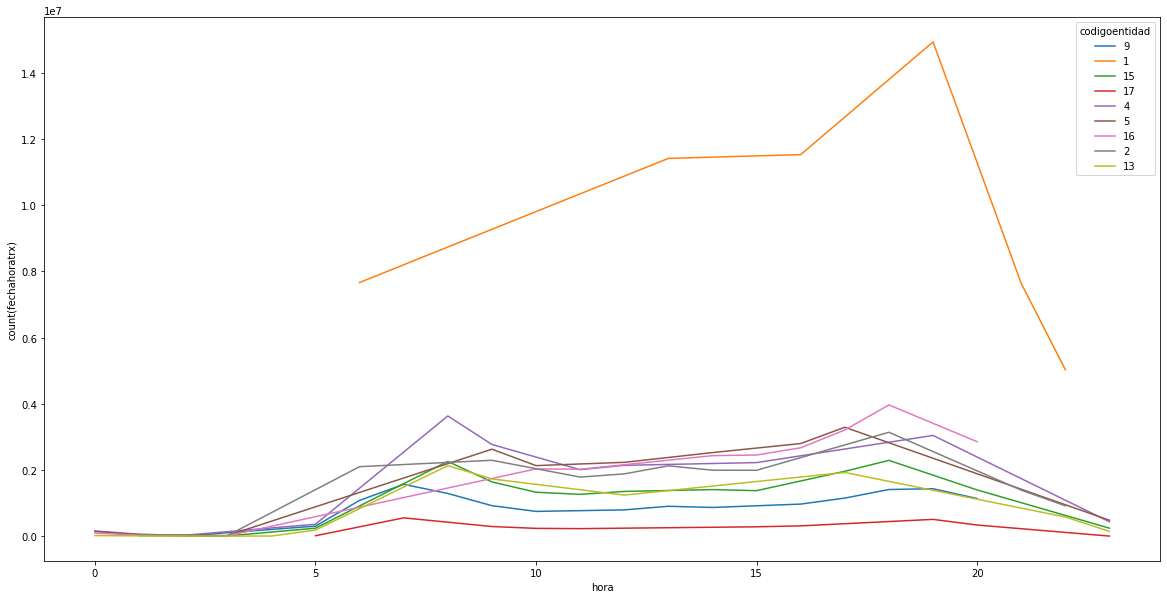

In [59]:
%%local
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (20,10)
df_local_horas['codigoentidad'] = df_local_horas['codigoentidad'].astype(str)
sns.lineplot(data=df_local_horas, x='hora', y='count(fechahoratrx)', hue='codigoentidad')
plt.show()